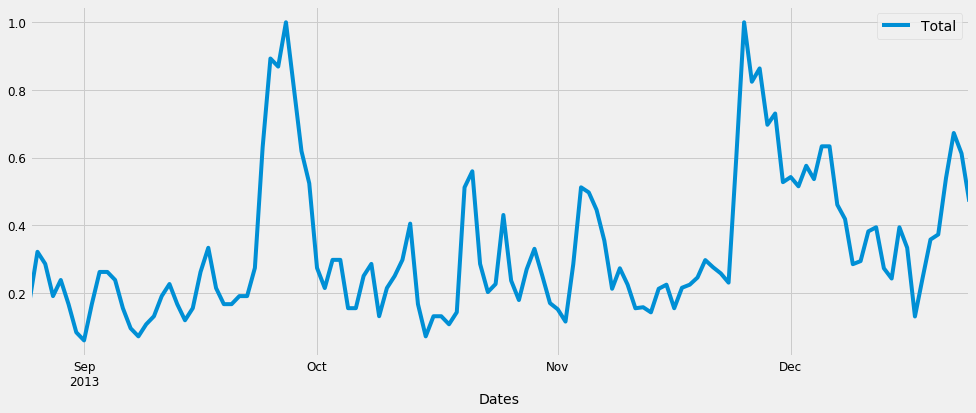

In [3]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMAResults 
import matplotlib
import numpy as numpy
from datetime import datetime

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

total_df = pd.read_excel("Sudan20132019.xlsx")

dates = total_df['Dates']
totalHits=total_df['Total']
# check missing values
dates.isnull().sum()
totalHits.isnull().sum()

df = total_df.loc[total_df['Dates'] < '2017-04-01 12:54:00 PM']
df.set_index('Dates', inplace=True) 
df.plot(figsize=(15, 6))
plt.show()


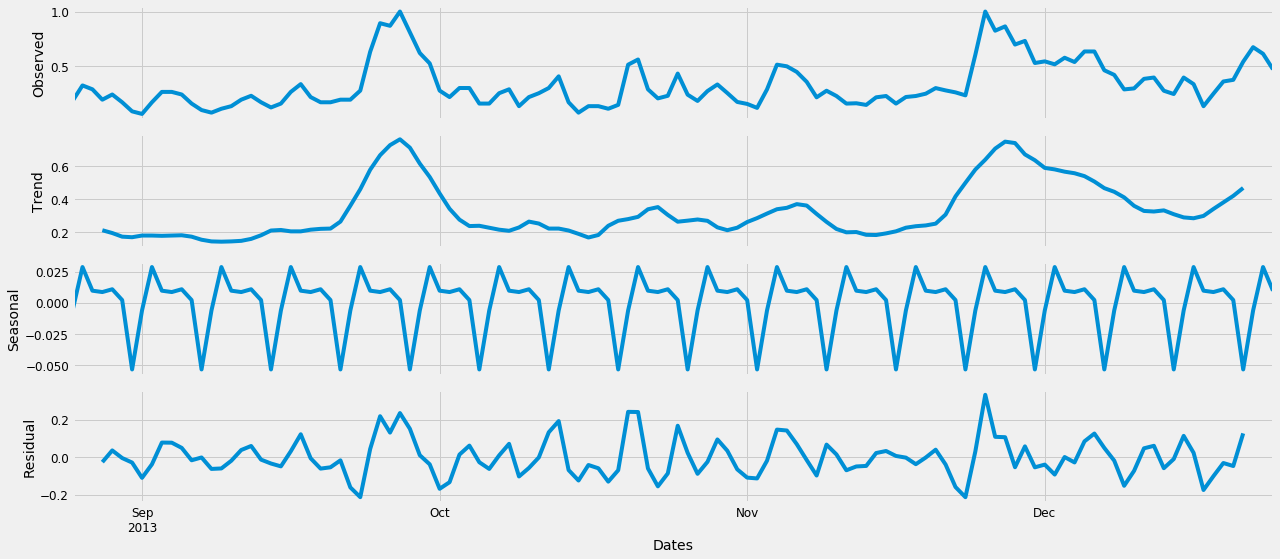

KeyError: (0, 1)

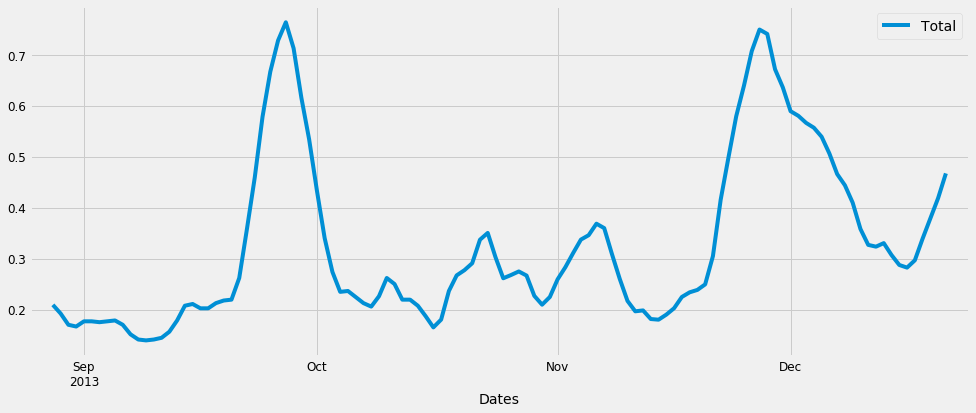

In [4]:
# Moving average of 7 days
k=7

y=df

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()
decomposition.trend.plot(figsize=(15, 6))

myY = decomposition.trend
#myY['pandas_SMA_4'] = myY.iloc[:,1].rolling(window=k).mean()

def movingaverage(interval, window_size):
    window = numpy.ones(int(window_size))/float(window_size)
    return numpy.convolve(interval, window, 'same')

for j in range(len(myY)-k):
    if myY[j,1] > movingaverage(myY[:,1] ,k):
        print(myY['Dates'])

In [ ]:
# ax = total_df['2013-08-25':].plot(label='observed')
# pred.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
# #ax.fill_between(pred_ci.index,
#              #   pred_ci.iloc[:, 0],
#             #    pred_ci.iloc[:, 1], color='k', alpha=.2)
# ax.set_xlabel('Date')
# ax.set_ylabel('Total keyword hit')
# plt.legend()
# plt.show()